Number of images in Normal class: 1589
Number of images in Osteoarthritis class: 2257


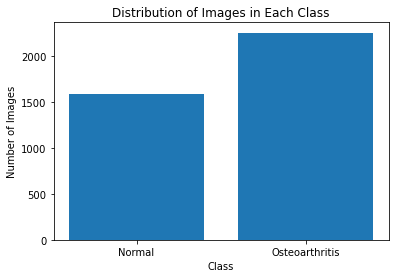

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load images from directories for each class
normal_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Normal')
osteoarthritis_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Osteoarthritis')

# Display the number of images in each class
print("Number of images in Normal class:", len(normal_images))
print("Number of images in Osteoarthritis class:", len(osteoarthritis_images))

# Create a histogram to visualize the distribution of images in each class
plt.bar(['Normal', 'Osteoarthritis'], [len(normal_images), len(osteoarthritis_images)])
plt.title('Distribution of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


2024-03-23 16:35:55.826115: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-23 16:35:55.827641: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 16:35:55.886747: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 16:35:56.118047: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 16:35:56.705962: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Number of images in Normal class: 1589
Number of images in Osteoarthritis class: 2257
Number of images in Normal class after augmentation: 2257


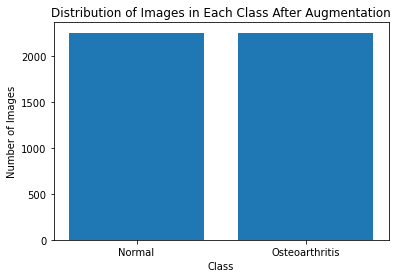

In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define a function to load and resize images from a folder
def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load images from directories for each class
normal_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Normal')
osteoarthritis_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Osteoarthritis')

# Display the number of images in each class
print("Number of images in Normal class:", len(normal_images))
print("Number of images in Osteoarthritis class:", len(osteoarthritis_images))

# Check if data augmentation is needed
if len(normal_images) < len(osteoarthritis_images):
    # Calculate the number of additional images needed
    num_additional_images = len(osteoarthritis_images) - len(normal_images)

    # Create an ImageDataGenerator for data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Choose random indices from the "Normal" class for augmentation
    sampled_indices = np.random.randint(0, len(normal_images), size=num_additional_images)

    # Perform data augmentation and append augmented images to the "Normal" class
    for index in sampled_indices:
        img = normal_images[index]
        img = img.reshape((1,) + img.shape)  # Reshape for flow() function
        for batch in datagen.flow(img, batch_size=1):
            normal_images.append(batch[0])  # Append augmented images
            break  # Exit the loop after one iteration of data augmentation

    # Display the number of images in the "Normal" class after augmentation
    print("Number of images in Normal class after augmentation:", len(normal_images))

# Create a histogram to visualize the distribution of images in each class after augmentation
plt.bar(['Normal', 'Osteoarthritis'], [len(normal_images), len(osteoarthritis_images)])
plt.title('Distribution of Images in Each Class After Augmentation')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [3]:
import random

# Set a seed for reproducibility
random.seed(42)

# Randomly select 1000 images from each class
selected_normal_images = random.sample(normal_images, 1000)
selected_osteoarthritis_images = random.sample(osteoarthritis_images, 1000)

# Combine selected images from both classes
selected_images = selected_normal_images + selected_osteoarthritis_images
labels = [0] * 1000 + [1] * 1000  # Assign labels (0 for Normal, 1 for Osteoarthritis)

# Split the selected images and labels into train and test sets (70:30 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_images, labels, test_size=0.3, random_state=42)

# Split the train set into train and validation sets (80:20 ratio)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the sizes of train, test, and validation sets
print("X_train size:", len(X_train))
print("X_test size:", len(X_test))
print("X_validation size:", len(X_val))


X_train size: 1120
X_test size: 600
X_validation size: 280


In [4]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score,balanced_accuracy_score,matthews_corrcoef

VGG16

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define a function to preprocess images
def preprocess_images(images):
    processed_images = []
    for img in images:
        # Resize image to (224, 224)
        resized_img = cv2.resize(img, (224, 224))
        # Convert the image to array and apply preprocessing specific to VGG16
        processed_img = preprocess_input(resized_img)
        processed_images.append(processed_img)
    return np.array(processed_images)

# Preprocess train, validation, and test images
X_train_preprocessed = preprocess_images(X_train)
X_val_preprocessed = preprocess_images(X_val)
X_test_preprocessed = preprocess_images(X_test)


In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,273 (56.63 MB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5922 - loss: 0.7441 - val_accuracy: 0.6857 - val_loss: 0.5867
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7176 - loss: 0.5288 - val_accuracy: 0.7500 - val_loss: 0.5140
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7986 - loss: 0.4537 - val_accuracy: 0.7929 - val_loss: 0.4746
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8239 - loss: 0.3979 - val_accuracy: 0.7893 - val_loss: 0.4650
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8390 - loss: 0.3575 - val_accuracy: 0.8071 - val_loss: 0.4449
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8602 - loss: 0.3417 - val_accuracy: 0.8179 - val_loss: 0.4420
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8456 - loss: 0.3448 - val_accuracy: 0.7821 - val_loss: 0.4644
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8722 - loss: 0.3067 - val_accuracy: 0.8071 - val_loss:

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


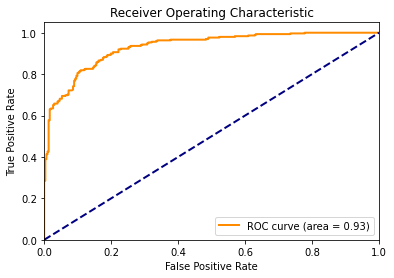

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3355378083311243
Validation Loss: 0.41201102376227294
Training Time (seconds): 1076.930165052414
Inference Time (seconds): 22.28292441368103
Validation Accuracy: 0.825
Test Accuracy: 0.8516666666666667
Confusion Matrix:
 [[267  35]
 [ 54 244]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       302
           1       0.87      0.82      0.85       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.9317358549268856
Metrics saved successfully


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_2000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9136 - loss: 0.2225 - val_accuracy: 0.8214 - val_loss: 0.4169
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9238 - loss: 0.2170 - val_accuracy: 0.8321 - val_loss: 0.4284
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9242 - loss: 0.2095 - val_accuracy: 0.8214 - val_loss: 0.4178
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9122 - loss: 0.2122 - val_accuracy: 0.8250 - val_loss: 0.4123
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9248 - loss: 0.2063 - val_accuracy: 0.8286 - val_loss: 0.4295
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9396 - loss: 0.1854 - val_accuracy: 0.8036 - val_loss: 0.4426
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9306 - loss: 0.1842 - val_accuracy: 0.8250 - val_loss: 0.4230
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9420 - loss: 0.1771 - val_accuracy: 0.8179 - v

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


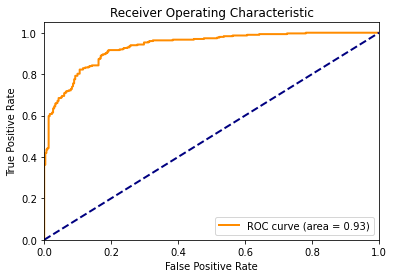

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3285172343606598
Validation Loss: 0.41438871548687894
Training Time (seconds): 461.05485248565674
Inference Time (seconds): 22.027602434158325
Validation Accuracy: 0.825
Test Accuracy: 0.8533333333333334
Confusion Matrix:
 [[270  32]
 [ 56 242]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       302
           1       0.88      0.81      0.85       298

    accuracy                           0.85       600
   macro avg       0.86      0.85      0.85       600
weighted avg       0.86      0.85      0.85       600

ROC AUC Score: 0.9344359749322192
Metrics saved successfully


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_2000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [21]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9258 - loss: 0.2002 - val_accuracy: 0.8286 - val_loss: 0.4211
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9358 - loss: 0.1913 - val_accuracy: 0.8286 - val_loss: 0.4211
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9339 - loss: 0.1876 - val_accuracy: 0.8286 - val_loss: 0.4249
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9319 - loss: 0.1968 - val_accuracy: 0.8179 - val_loss: 0.4154
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9480 - loss: 0.1781 - val_accuracy: 0.8286 - val_loss: 0.4236
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9470 - loss: 0.1699 - val_accuracy: 0.8286 - val_loss: 0.4299
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9628 - loss: 0.1624 - val_accuracy: 0.8250 - val_loss: 0.4270
Epoch 8/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9482 - loss: 0.1647 - val_accuracy: 0.8214 - v

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


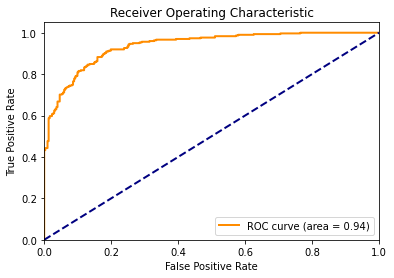

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3186939123742601
Validation Loss: 0.41761697771869094
Training Time (seconds): 460.51781129837036
Inference Time (seconds): 22.056608200073242
Validation Accuracy: 0.8178571428571428
Test Accuracy: 0.855
Confusion Matrix:
 [[264  38]
 [ 49 249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       302
           1       0.87      0.84      0.85       298

    accuracy                           0.85       600
   macro avg       0.86      0.85      0.85       600
weighted avg       0.86      0.85      0.85       600

ROC AUC Score: 0.9372583225921152
Metrics saved successfully


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_2000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [24]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9373 - loss: 0.1768 - val_accuracy: 0.8286 - val_loss: 0.4203
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9300 - loss: 0.1830 - val_accuracy: 0.8179 - val_loss: 0.4323
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9295 - loss: 0.1862 - val_accuracy: 0.8214 - val_loss: 0.4188
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9452 - loss: 0.1694 - val_accuracy: 0.8214 - val_loss: 0.4189
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9513 - loss: 0.1582 - val_accuracy: 0.8321 - val_loss: 0.4228
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9516 - loss: 0.1504 - val_accuracy: 0.8286 - val_loss: 0.4453
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9570 - loss: 0.1412 - val_accuracy: 0.8286 - val_loss: 0.4291
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9493 - loss: 0.1488 - val_accuracy: 0.8250 - v

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


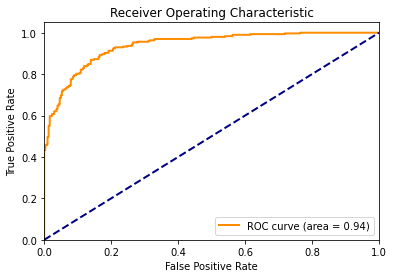

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3180147020070415
Validation Loss: 0.42079595489342503
Training Time (seconds): 410.04599118232727
Inference Time (seconds): 21.98153328895569
Validation Accuracy: 0.8214285714285714
Test Accuracy: 0.8533333333333334
Confusion Matrix:
 [[267  35]
 [ 53 245]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       302
           1       0.88      0.82      0.85       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.9385472687675008
Metrics saved successfully


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_2000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Dense

In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
x = Dense(128, activation='relu')(x)   # Additional dense layer
x = Dense(64, activation='relu')(x)    # Additional dense layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,887,233 (56.79 MB)

 Trainable params: 172,545 (674.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


In [28]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5105 - loss: 0.7662 - val_accuracy: 0.7143 - val_loss: 0.5899
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7322 - loss: 0.5333 - val_accuracy: 0.7429 - val_loss: 0.5280
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7959 - loss: 0.4524 - val_accuracy: 0.7893 - val_loss: 0.4807
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8233 - loss: 0.3965 - val_accuracy: 0.7679 - val_loss: 0.4865
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8374 - loss: 0.3670 - val_accuracy: 0.8036 - val_loss: 0.4548
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8691 - loss: 0.3144 - val_accuracy: 0.8214 - val_loss: 0.4349
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8851 - loss: 0.2904 - val_accuracy: 0.8107 - val_loss: 0.4325
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9074 - loss: 0.2593 - val_accuracy: 0.8036 - val_loss:

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


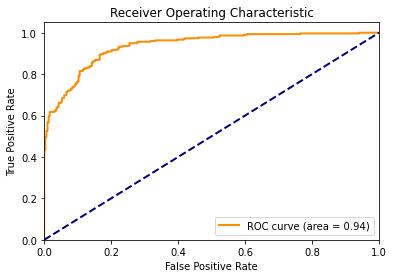

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3310758904693746
Validation Loss: 0.4318095291370674
Training Time (seconds): 1077.9093313217163
Inference Time (seconds): 22.13651156425476
Validation Accuracy: 0.8285714285714286
Test Accuracy: 0.8516666666666667
Confusion Matrix:
 [[261  41]
 [ 48 250]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       302
           1       0.86      0.84      0.85       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.9357693675274457
Metrics saved successfully


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [31]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9431 - loss: 0.1549 - val_accuracy: 0.8179 - val_loss: 0.4306
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9564 - loss: 0.1357 - val_accuracy: 0.8214 - val_loss: 0.4447
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9525 - loss: 0.1344 - val_accuracy: 0.8036 - val_loss: 0.4962
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9672 - loss: 0.1220 - val_accuracy: 0.8000 - val_loss: 0.4857
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9634 - loss: 0.1236 - val_accuracy: 0.8143 - val_loss: 0.4546
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9608 - loss: 0.1146 - val_accuracy: 0.8179 - val_loss: 0.4659
Training Time: 296.55890250205994 seconds


In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


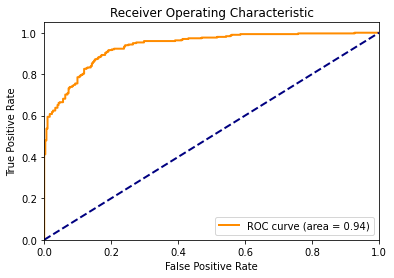

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.337712016182514
Validation Loss: 0.4349364025894348
Training Time (seconds): 296.55890250205994
Inference Time (seconds): 21.94314169883728
Validation Accuracy: 0.8178571428571428
Test Accuracy: 0.85
Confusion Matrix:
 [[266  36]
 [ 54 244]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       302
           1       0.87      0.82      0.84       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.9352248988843948
Metrics saved successfully


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [34]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9551 - loss: 0.1392 - val_accuracy: 0.8179 - val_loss: 0.4474
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9557 - loss: 0.1421 - val_accuracy: 0.8071 - val_loss: 0.4480
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9696 - loss: 0.1180 - val_accuracy: 0.8143 - val_loss: 0.4669
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9722 - loss: 0.1138 - val_accuracy: 0.8179 - val_loss: 0.4695
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9650 - loss: 0.1099 - val_accuracy: 0.8286 - val_loss: 0.4482
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9668 - loss: 0.1064 - val_accuracy: 0.8321 - val_loss: 0.4544
Training Time: 307.07679867744446 seconds


In [35]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


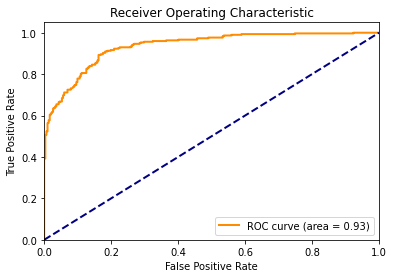

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.37316246397473385
Validation Loss: 0.4513067107818876
Training Time (seconds): 307.07679867744446
Inference Time (seconds): 21.911216020584106
Validation Accuracy: 0.8178571428571428
Test Accuracy: 0.8233333333333334
Confusion Matrix:
 [[282  20]
 [ 86 212]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       302
           1       0.91      0.71      0.80       298

    accuracy                           0.82       600
   macro avg       0.84      0.82      0.82       600
weighted avg       0.84      0.82      0.82       600

ROC AUC Score: 0.9347359882661451
Metrics saved successfully


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [37]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9526 - loss: 0.1495 - val_accuracy: 0.8071 - val_loss: 0.4479
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9684 - loss: 0.1202 - val_accuracy: 0.8179 - val_loss: 0.4532
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9702 - loss: 0.1140 - val_accuracy: 0.8071 - val_loss: 0.4726
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9780 - loss: 0.1085 - val_accuracy: 0.8107 - val_loss: 0.4849
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9752 - loss: 0.0942 - val_accuracy: 0.8143 - val_loss: 0.4764
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9769 - loss: 0.0931 - val_accuracy: 0.8071 - val_loss: 0.4867
Training Time: 307.17458510398865 seconds


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


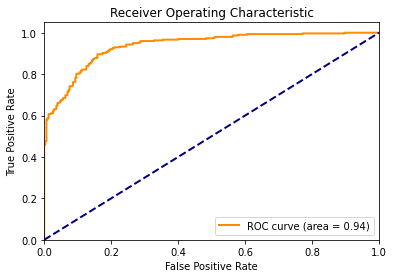

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3261629768431358
Validation Loss: 0.45237129608868165
Training Time (seconds): 307.17458510398865
Inference Time (seconds): 22.05548119544983
Validation Accuracy: 0.8071428571428572
Test Accuracy: 0.86
Confusion Matrix:
 [[258  44]
 [ 40 258]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       302
           1       0.85      0.87      0.86       298

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600

ROC AUC Score: 0.9373916618516378
Metrics saved successfully


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Dense+Dropout

In [39]:
from tensorflow.keras.layers import Dropout

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
x = Dropout(0.5)(x)  # Dropout layer with 50% dropout rate
x = Dense(128, activation='relu')(x)  # Additional dense layer
predictions = Dense(1, activation='sigmoid')(x)   # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,879,041 (56.76 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [40]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5400 - loss: 0.8811 - val_accuracy: 0.5571 - val_loss: 0.7094
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6408 - loss: 0.7129 - val_accuracy: 0.7321 - val_loss: 0.5726
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6876 - loss: 0.6245 - val_accuracy: 0.7393 - val_loss: 0.5329
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7065 - loss: 0.5869 - val_accuracy: 0.7464 - val_loss: 0.5111
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7168 - loss: 0.5525 - val_accuracy: 0.7679 - val_loss: 0.4854
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7059 - loss: 0.5588 - val_accuracy: 0.7714 - val_loss: 0.4757
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7742 - loss: 0.4942 - val_accuracy: 0.7571 - val_loss: 0.4821
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7652 - loss: 0.4801 - val_accuracy: 0.7786 - val_loss:

In [41]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


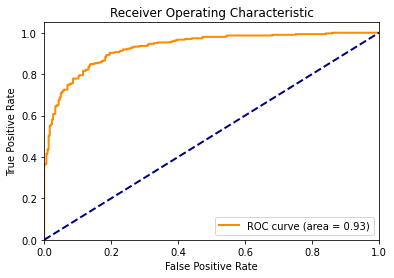

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3408642673547867
Validation Loss: 0.4128568203000067
Training Time (seconds): 1434.4599900245667
Inference Time (seconds): 22.110571146011353
Validation Accuracy: 0.8178571428571428
Test Accuracy: 0.8466666666666667
Confusion Matrix:
 [[263  39]
 [ 53 245]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       302
           1       0.86      0.82      0.84       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.9299802213431708
Metrics saved successfully


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [43]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8692 - loss: 0.3109 - val_accuracy: 0.8071 - val_loss: 0.4266
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8556 - loss: 0.3171 - val_accuracy: 0.8143 - val_loss: 0.4174
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8567 - loss: 0.3099 - val_accuracy: 0.8143 - val_loss: 0.4185
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8770 - loss: 0.2705 - val_accuracy: 0.8071 - val_loss: 0.4164
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8570 - loss: 0.2952 - val_accuracy: 0.8214 - val_loss: 0.4047
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8789 - loss: 0.2865 - val_accuracy: 0.8250 - val_loss: 0.4108
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9070 - loss: 0.2457 - val_accuracy: 0.8214 - val_loss: 0.4059
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8889 - loss: 0.2596 - val_accuracy: 0.8143 - v

In [44]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


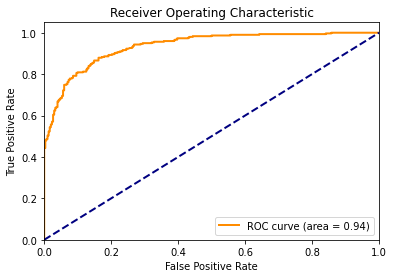

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.33578733595620797
Validation Loss: 0.4076986596491367
Training Time (seconds): 513.0063259601593
Inference Time (seconds): 21.949870109558105
Validation Accuracy: 0.8214285714285714
Test Accuracy: 0.85
Confusion Matrix:
 [[274  28]
 [ 62 236]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       302
           1       0.89      0.79      0.84       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.9351693408595938
Metrics saved successfully


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [46]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8746 - loss: 0.2778 - val_accuracy: 0.8143 - val_loss: 0.4133
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8808 - loss: 0.2719 - val_accuracy: 0.8179 - val_loss: 0.4130
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8972 - loss: 0.2602 - val_accuracy: 0.8179 - val_loss: 0.4183
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9007 - loss: 0.2553 - val_accuracy: 0.8250 - val_loss: 0.4146
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8914 - loss: 0.2481 - val_accuracy: 0.8214 - val_loss: 0.4135
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9114 - loss: 0.2215 - val_accuracy: 0.8107 - val_loss: 0.4205
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9109 - loss: 0.2442 - val_accuracy: 0.8179 - val_loss: 0.4124
Epoch 8/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8842 - loss: 0.2584 - val_accuracy: 0.8179 - v

In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


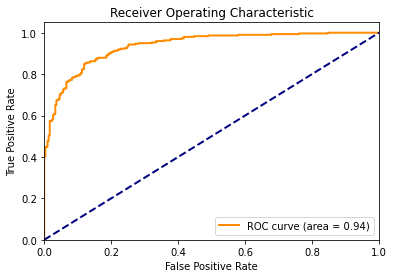

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.321662176324384
Validation Loss: 0.4149224457074486
Training Time (seconds): 614.6890776157379
Inference Time (seconds): 22.004109144210815
Validation Accuracy: 0.8178571428571428
Test Accuracy: 0.8633333333333333
Confusion Matrix:
 [[266  36]
 [ 46 252]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       302
           1       0.88      0.85      0.86       298

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600

ROC AUC Score: 0.9369916440730698
Metrics saved successfully


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [49]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8896 - loss: 0.2451 - val_accuracy: 0.8179 - val_loss: 0.4153
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8889 - loss: 0.2453 - val_accuracy: 0.8071 - val_loss: 0.4197
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9147 - loss: 0.2218 - val_accuracy: 0.8000 - val_loss: 0.4335
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9163 - loss: 0.2181 - val_accuracy: 0.8071 - val_loss: 0.4216
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9184 - loss: 0.2013 - val_accuracy: 0.8071 - val_loss: 0.4272
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9027 - loss: 0.2051 - val_accuracy: 0.8036 - val_loss: 0.4311
Training Time: 307.30289459228516 seconds


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


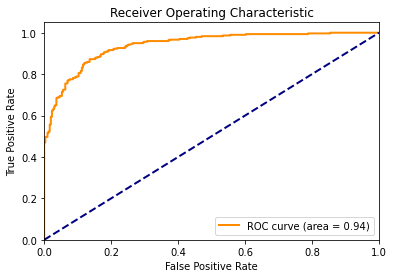

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.32002335413685046
Validation Loss: 0.4176919237936482
Training Time (seconds): 307.30289459228516
Inference Time (seconds): 22.09006929397583
Validation Accuracy: 0.8178571428571428
Test Accuracy: 0.8533333333333334
Confusion Matrix:
 [[268  34]
 [ 54 244]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       302
           1       0.88      0.82      0.85       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.9396806524734431
Metrics saved successfully


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+GlobalAveragePooling+Dense

In [51]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add GlobalAveragePooling2D layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add Dense layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)  # Additional Dense layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,879,041 (56.76 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [52]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5730 - loss: 0.7299 - val_accuracy: 0.7393 - val_loss: 0.5616
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7448 - loss: 0.5033 - val_accuracy: 0.7821 - val_loss: 0.5002
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8058 - loss: 0.4093 - val_accuracy: 0.8179 - val_loss: 0.4462
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8371 - loss: 0.3812 - val_accuracy: 0.8214 - val_loss: 0.4256
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8587 - loss: 0.3414 - val_accuracy: 0.8179 - val_loss: 0.4199
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8798 - loss: 0.3079 - val_accuracy: 0.8250 - val_loss: 0.4100
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8965 - loss: 0.2814 - val_accuracy: 0.8214 - val_loss: 0.4167
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8909 - loss: 0.2741 - val_accuracy: 0.8321 - val_loss:

In [53]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


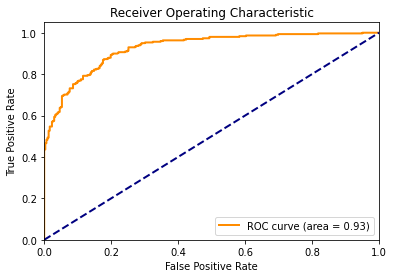

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3485618002928804
Validation Loss: 0.3966627295399333
Training Time (seconds): 717.6781339645386
Inference Time (seconds): 22.235865831375122
Validation Accuracy: 0.8357142857142857
Test Accuracy: 0.8383333333333334
Confusion Matrix:
 [[249  53]
 [ 44 254]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       302
           1       0.83      0.85      0.84       298

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600

ROC AUC Score: 0.9262689452864572
Metrics saved successfully


In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [55]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8922 - loss: 0.2672 - val_accuracy: 0.8321 - val_loss: 0.4057
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8976 - loss: 0.2415 - val_accuracy: 0.8500 - val_loss: 0.4001
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9230 - loss: 0.2209 - val_accuracy: 0.8286 - val_loss: 0.4022
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9241 - loss: 0.2173 - val_accuracy: 0.8179 - val_loss: 0.3943
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9340 - loss: 0.2055 - val_accuracy: 0.8000 - val_loss: 0.4200
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9404 - loss: 0.1870 - val_accuracy: 0.8071 - val_loss: 0.4175
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9436 - loss: 0.1689 - val_accuracy: 0.8321 - val_loss: 0.3892
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9406 - loss: 0.1640 - val_accuracy: 0.7929 - v

In [56]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


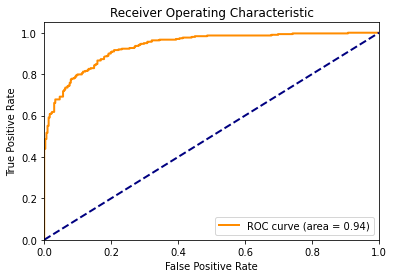

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.33631563470003784
Validation Loss: 0.3906791507840645
Training Time (seconds): 716.3870391845703
Inference Time (seconds): 22.02932119369507
Validation Accuracy: 0.85
Test Accuracy: 0.85
Confusion Matrix:
 [[273  29]
 [ 61 237]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       302
           1       0.89      0.80      0.84       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.9358693719720877
Metrics saved successfully


In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [58]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9427 - loss: 0.1532 - val_accuracy: 0.8357 - val_loss: 0.3994
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9549 - loss: 0.1470 - val_accuracy: 0.8321 - val_loss: 0.3998
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9559 - loss: 0.1384 - val_accuracy: 0.8107 - val_loss: 0.4277
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9573 - loss: 0.1353 - val_accuracy: 0.8393 - val_loss: 0.4001
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9598 - loss: 0.1220 - val_accuracy: 0.8214 - val_loss: 0.4220
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9656 - loss: 0.1240 - val_accuracy: 0.8393 - val_loss: 0.3902
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9673 - loss: 0.1140 - val_accuracy: 0.8464 - val_loss: 0.4001
Epoch 8/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9707 - loss: 0.1047 - val_accuracy: 0.8393 - v

In [59]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


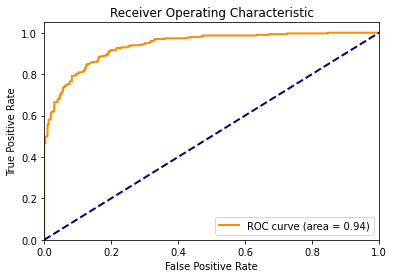

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3237936930845075
Validation Loss: 0.3924254433889858
Training Time (seconds): 563.5177581310272
Inference Time (seconds): 22.090680837631226
Validation Accuracy: 0.8392857142857143
Test Accuracy: 0.85
Confusion Matrix:
 [[266  36]
 [ 54 244]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       302
           1       0.87      0.82      0.84       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.939113960620472
Metrics saved successfully


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [61]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9677 - loss: 0.1186 - val_accuracy: 0.8321 - val_loss: 0.4003
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9673 - loss: 0.1135 - val_accuracy: 0.8357 - val_loss: 0.4090
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9780 - loss: 0.1005 - val_accuracy: 0.8143 - val_loss: 0.4352
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9727 - loss: 0.1057 - val_accuracy: 0.8429 - val_loss: 0.4042
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9779 - loss: 0.0953 - val_accuracy: 0.8464 - val_loss: 0.4046
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9815 - loss: 0.0928 - val_accuracy: 0.8357 - val_loss: 0.4075
Training Time: 307.1645197868347 seconds


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


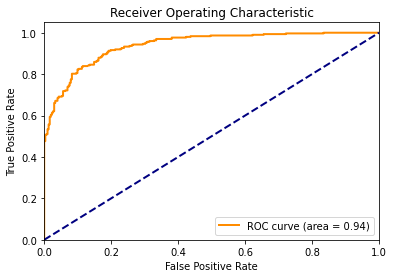

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3218521301212479
Validation Loss: 0.40297355886233355
Training Time (seconds): 307.1645197868347
Inference Time (seconds): 21.99162793159485
Validation Accuracy: 0.8321428571428572
Test Accuracy: 0.8516666666666667
Confusion Matrix:
 [[255  47]
 [ 42 256]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       302
           1       0.84      0.86      0.85       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.9395250900040002
Metrics saved successfully


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+ Conv2D + GlobalAveragePooling2D +Dropout+ Dense

In [63]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add Conv2D layer
x = base_model.output
x = Conv2D(128, (3, 3), activation='relu')(x)  # Example Conv2D layer

# Add GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(x)

# Add Dropout layer
x = Dropout(0.5)(x)  # Example Dropout layer with dropout rate of 0.5

# Add Dense layers
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 5, 128)      │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 15,337,921 (58.51 MB)

 Trainable params: 623,233 (2.38 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [64]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5404 - loss: 0.9711 - val_accuracy: 0.7500 - val_loss: 0.5924
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6759 - loss: 0.6069 - val_accuracy: 0.7893 - val_loss: 0.5088
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7435 - loss: 0.5055 - val_accuracy: 0.7929 - val_loss: 0.4915
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7581 - loss: 0.4772 - val_accuracy: 0.7964 - val_loss: 0.4811
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8229 - loss: 0.3965 - val_accuracy: 0.8250 - val_loss: 0.4676
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8411 - loss: 0.3599 - val_accuracy: 0.8214 - val_loss: 0.4643
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8570 - loss: 0.3277 - val_accuracy: 0.8393 - val_loss: 0.4421
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8759 - loss: 0.3055 - val_accuracy: 0.8214 - val_loss:

In [65]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


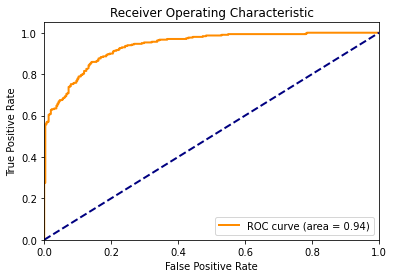

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.32120443787706915
Validation Loss: 0.4315241675600258
Training Time (seconds): 668.4097211360931
Inference Time (seconds): 22.183300733566284
Validation Accuracy: 0.8214285714285714
Test Accuracy: 0.85
Confusion Matrix:
 [[262  40]
 [ 50 248]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       302
           1       0.86      0.83      0.85       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.9365694030845815
Metrics saved successfully


In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [67]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8974 - loss: 0.2740 - val_accuracy: 0.8321 - val_loss: 0.4448
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8788 - loss: 0.2730 - val_accuracy: 0.8393 - val_loss: 0.4469
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8915 - loss: 0.2283 - val_accuracy: 0.8071 - val_loss: 0.5114
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8958 - loss: 0.2478 - val_accuracy: 0.8321 - val_loss: 0.4484
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9092 - loss: 0.2170 - val_accuracy: 0.8321 - val_loss: 0.4569
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9379 - loss: 0.1738 - val_accuracy: 0.8286 - val_loss: 0.4940
Training Time: 308.5006673336029 seconds


In [68]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


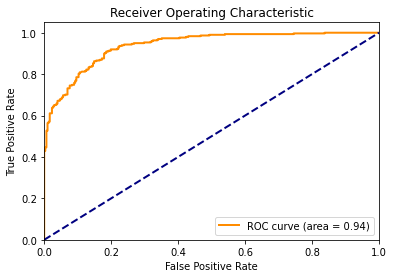

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.31601152830833795
Validation Loss: 0.4429555060935971
Training Time (seconds): 308.5006673336029
Inference Time (seconds): 22.010473012924194
Validation Accuracy: 0.8321428571428572
Test Accuracy: 0.8466666666666667
Confusion Matrix:
 [[265  37]
 [ 55 243]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       302
           1       0.87      0.82      0.84       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.9386694964220632
Metrics saved successfully


In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [70]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8927 - loss: 0.2695 - val_accuracy: 0.8250 - val_loss: 0.4493
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8749 - loss: 0.2934 - val_accuracy: 0.8357 - val_loss: 0.4473
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9155 - loss: 0.2142 - val_accuracy: 0.8250 - val_loss: 0.4545
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9066 - loss: 0.2302 - val_accuracy: 0.8214 - val_loss: 0.4896
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9109 - loss: 0.2154 - val_accuracy: 0.8429 - val_loss: 0.4428
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9170 - loss: 0.2037 - val_accuracy: 0.8179 - val_loss: 0.4694
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9334 - loss: 0.1577 - val_accuracy: 0.8393 - val_loss: 0.4726
Epoch 8/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9542 - loss: 0.1531 - val_accuracy: 0.8214 - v

In [71]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


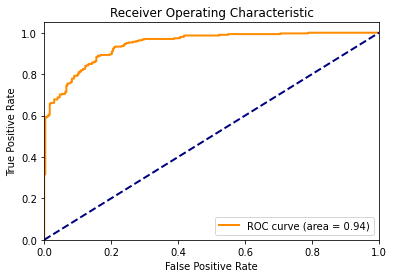

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.31565060992936383
Validation Loss: 0.44121178027729957
Training Time (seconds): 513.4688537120819
Inference Time (seconds): 22.037060260772705
Validation Accuracy: 0.8428571428571429
Test Accuracy: 0.8516666666666667
Confusion Matrix:
 [[275  27]
 [ 62 236]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       302
           1       0.90      0.79      0.84       298

    accuracy                           0.85       600
   macro avg       0.86      0.85      0.85       600
weighted avg       0.86      0.85      0.85       600

ROC AUC Score: 0.9433141472954354
Metrics saved successfully


In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [73]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9319 - loss: 0.1861 - val_accuracy: 0.8357 - val_loss: 0.4743
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9409 - loss: 0.1797 - val_accuracy: 0.8321 - val_loss: 0.4830
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9383 - loss: 0.1582 - val_accuracy: 0.8321 - val_loss: 0.4921
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9437 - loss: 0.1637 - val_accuracy: 0.8357 - val_loss: 0.4992
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9506 - loss: 0.1454 - val_accuracy: 0.8286 - val_loss: 0.5020
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9374 - loss: 0.1484 - val_accuracy: 0.8464 - val_loss: 0.4929
Training Time: 307.9779419898987 seconds


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


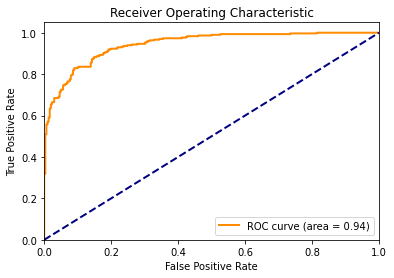

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.314748841928326
Validation Loss: 0.47226224797467303
Training Time (seconds): 307.9779419898987
Inference Time (seconds): 22.06997561454773
Validation Accuracy: 0.8357142857142857
Test Accuracy: 0.8666666666666667
Confusion Matrix:
 [[276  26]
 [ 54 244]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       302
           1       0.90      0.82      0.86       298

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

ROC AUC Score: 0.9437808347037647
Metrics saved successfully


In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+LSTM+Dense

In [76]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, LSTM, Reshape


# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features from images using VGG16
vgg_output = base_model.output

# Add GlobalAveragePooling2D layer to pool spatial features
x = GlobalAveragePooling2D()(vgg_output)

# Reshape features for LSTM input
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for LSTM input

# Add LSTM layer
x = LSTM(128)(x)

# Add Dense layers for classification
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with LSTM and Dense layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 15,076,161 (57.51 MB)

 Trainable params: 361,473 (1.38 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [77]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5796 - loss: 0.6826 - val_accuracy: 0.6893 - val_loss: 0.6418
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7223 - loss: 0.6095 - val_accuracy: 0.7286 - val_loss: 0.5818
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7594 - loss: 0.5319 - val_accuracy: 0.7536 - val_loss: 0.5249
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8267 - loss: 0.4559 - val_accuracy: 0.7857 - val_loss: 0.4826
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8430 - loss: 0.3962 - val_accuracy: 0.7893 - val_loss: 0.4500
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8625 - loss: 0.3451 - val_accuracy: 0.8036 - val_loss: 0.4353
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8600 - loss: 0.3217 - val_accuracy: 0.8250 - val_loss: 0.4155
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8902 - loss: 0.2803 - val_accuracy: 0.8286 - val_loss:

In [78]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


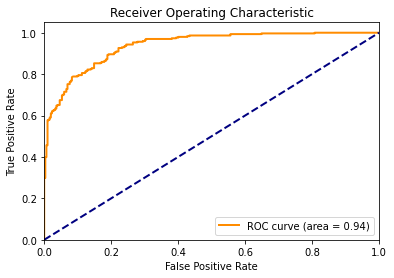

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.32523073148499565
Validation Loss: 0.38126261559991315
Training Time (seconds): 1118.1900980472565
Inference Time (seconds): 22.213863134384155
Validation Accuracy: 0.8142857142857143
Test Accuracy: 0.8466666666666667
Confusion Matrix:
 [[257  45]
 [ 47 251]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       302
           1       0.85      0.84      0.85       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.9373027690119561
Metrics saved successfully


In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [80]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9516 - loss: 0.1345 - val_accuracy: 0.8107 - val_loss: 0.4154
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9739 - loss: 0.1132 - val_accuracy: 0.8250 - val_loss: 0.4082
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9665 - loss: 0.1195 - val_accuracy: 0.8214 - val_loss: 0.3969
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9649 - loss: 0.1068 - val_accuracy: 0.8107 - val_loss: 0.3946
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9619 - loss: 0.1075 - val_accuracy: 0.8179 - val_loss: 0.3965
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9851 - loss: 0.0862 - val_accuracy: 0.8179 - val_loss: 0.4020
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9800 - loss: 0.0818 - val_accuracy: 0.8143 - val_loss: 0.4166
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9848 - loss: 0.0754 - val_accuracy: 0.8250 - v

In [81]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


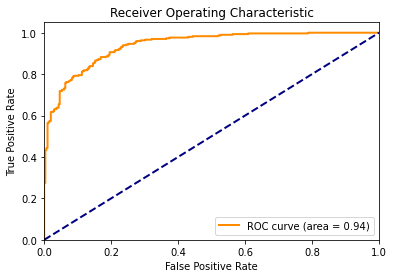

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.32688942271831234
Validation Loss: 0.39481651653219524
Training Time (seconds): 461.2779960632324
Inference Time (seconds): 22.15795636177063
Validation Accuracy: 0.8107142857142857
Test Accuracy: 0.85
Confusion Matrix:
 [[261  41]
 [ 49 249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       302
           1       0.86      0.84      0.85       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.939369527534557
Metrics saved successfully


In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [83]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9746 - loss: 0.1083 - val_accuracy: 0.8214 - val_loss: 0.3941
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9819 - loss: 0.0915 - val_accuracy: 0.8214 - val_loss: 0.4029
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9759 - loss: 0.0876 - val_accuracy: 0.8036 - val_loss: 0.4037
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9912 - loss: 0.0699 - val_accuracy: 0.8143 - val_loss: 0.4114
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9893 - loss: 0.0765 - val_accuracy: 0.8179 - val_loss: 0.4204
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9928 - loss: 0.0604 - val_accuracy: 0.8286 - val_loss: 0.4404
Training Time: 307.3506352901459 seconds


In [84]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


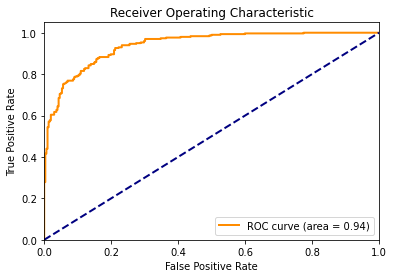

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3280144270772575
Validation Loss: 0.3945573596681042
Training Time (seconds): 307.3506352901459
Inference Time (seconds): 22.02249550819397
Validation Accuracy: 0.8214285714285714
Test Accuracy: 0.855
Confusion Matrix:
 [[255  47]
 [ 40 258]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       302
           1       0.85      0.87      0.86       298

    accuracy                           0.85       600
   macro avg       0.86      0.86      0.85       600
weighted avg       0.86      0.85      0.85       600

ROC AUC Score: 0.9398251033379261
Metrics saved successfully


In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [86]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9764 - loss: 0.0918 - val_accuracy: 0.8214 - val_loss: 0.4096
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9838 - loss: 0.0862 - val_accuracy: 0.8286 - val_loss: 0.4290
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9863 - loss: 0.0803 - val_accuracy: 0.8107 - val_loss: 0.4017
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9893 - loss: 0.0712 - val_accuracy: 0.8250 - val_loss: 0.4140
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9903 - loss: 0.0619 - val_accuracy: 0.8179 - val_loss: 0.4166
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9898 - loss: 0.0590 - val_accuracy: 0.8179 - val_loss: 0.4382
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9913 - loss: 0.0559 - val_accuracy: 0.8214 - val_loss: 0.4205
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9895 - loss: 0.0526 - val_accuracy: 0.8143 - v

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


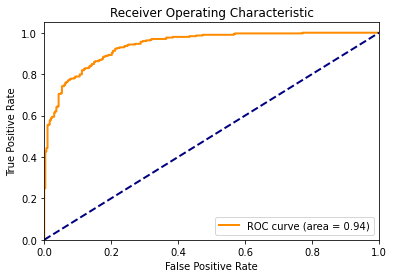

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3409928166244843
Validation Loss: 0.4022281151797119
Training Time (seconds): 409.54673409461975
Inference Time (seconds): 21.98953890800476
Validation Accuracy: 0.8107142857142857
Test Accuracy: 0.85
Confusion Matrix:
 [[259  43]
 [ 47 251]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       302
           1       0.85      0.84      0.85       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.9394917551891195
Metrics saved successfully


In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+GRU+Dense

In [88]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,273 (56.63 MB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [89]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5101 - loss: 0.8875 - val_accuracy: 0.6464 - val_loss: 0.6715
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6942 - loss: 0.5757 - val_accuracy: 0.7393 - val_loss: 0.5506
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7669 - loss: 0.4810 - val_accuracy: 0.7643 - val_loss: 0.5036
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8027 - loss: 0.4201 - val_accuracy: 0.7571 - val_loss: 0.5113
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8433 - loss: 0.3748 - val_accuracy: 0.7857 - val_loss: 0.4732
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8315 - loss: 0.3587 - val_accuracy: 0.7964 - val_loss: 0.4640
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8599 - loss: 0.3306 - val_accuracy: 0.8107 - val_loss: 0.4402
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8712 - loss: 0.3143 - val_accuracy: 0.8071 - val_loss:

In [90]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


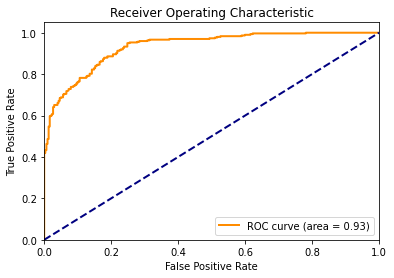

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.33831316719053506
Validation Loss: 0.4107913817988325
Training Time (seconds): 1279.7147722244263
Inference Time (seconds): 22.136943817138672
Validation Accuracy: 0.8285714285714286
Test Accuracy: 0.83
Confusion Matrix:
 [[272  30]
 [ 72 226]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       302
           1       0.88      0.76      0.82       298

    accuracy                           0.83       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600

ROC AUC Score: 0.9327247877683452
Metrics saved successfully


In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [92]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9186 - loss: 0.2175 - val_accuracy: 0.8214 - val_loss: 0.4253
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9356 - loss: 0.1925 - val_accuracy: 0.8286 - val_loss: 0.4323
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9294 - loss: 0.1993 - val_accuracy: 0.8179 - val_loss: 0.4375
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9366 - loss: 0.1884 - val_accuracy: 0.7857 - val_loss: 0.4665
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9345 - loss: 0.1882 - val_accuracy: 0.8286 - val_loss: 0.4319
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9386 - loss: 0.1814 - val_accuracy: 0.8286 - val_loss: 0.4223
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9378 - loss: 0.1847 - val_accuracy: 0.8357 - val_loss: 0.4196
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9403 - loss: 0.1686 - val_accuracy: 0.8429 - v

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


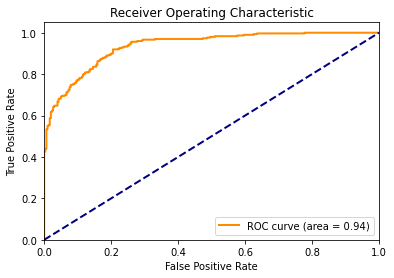

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.32192516045692987
Validation Loss: 0.41721151296326603
Training Time (seconds): 665.7366795539856
Inference Time (seconds): 22.036134719848633
Validation Accuracy: 0.8428571428571429
Test Accuracy: 0.84
Confusion Matrix:
 [[261  41]
 [ 55 243]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       302
           1       0.86      0.82      0.84       298

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600

ROC AUC Score: 0.935580470243122
Metrics saved successfully


In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [94]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9453 - loss: 0.1606 - val_accuracy: 0.8321 - val_loss: 0.4215
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9424 - loss: 0.1668 - val_accuracy: 0.8429 - val_loss: 0.4156
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9580 - loss: 0.1558 - val_accuracy: 0.8357 - val_loss: 0.4277
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9563 - loss: 0.1462 - val_accuracy: 0.8393 - val_loss: 0.4143
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9478 - loss: 0.1503 - val_accuracy: 0.8321 - val_loss: 0.4398
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9517 - loss: 0.1564 - val_accuracy: 0.8250 - val_loss: 0.4275
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9630 - loss: 0.1418 - val_accuracy: 0.8250 - val_loss: 0.4380
Epoch 8/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9575 - loss: 0.1461 - val_accuracy: 0.8143 - v

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


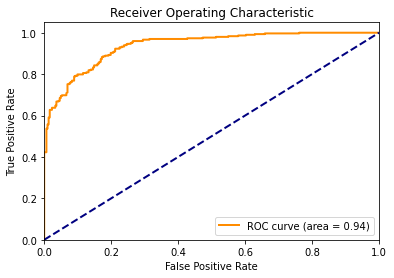

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3312574831962961
Validation Loss: 0.41463511931908204
Training Time (seconds): 460.1975054740906
Inference Time (seconds): 21.999840021133423
Validation Accuracy: 0.8392857142857143
Test Accuracy: 0.8416666666666667
Confusion Matrix:
 [[276  26]
 [ 69 229]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       302
           1       0.90      0.77      0.83       298

    accuracy                           0.84       600
   macro avg       0.85      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600

ROC AUC Score: 0.937147206542513
Metrics saved successfully


In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [96]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9459 - loss: 0.1506 - val_accuracy: 0.8250 - val_loss: 0.4283
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9433 - loss: 0.1609 - val_accuracy: 0.8179 - val_loss: 0.4280
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9507 - loss: 0.1447 - val_accuracy: 0.8286 - val_loss: 0.4178
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9548 - loss: 0.1455 - val_accuracy: 0.8214 - val_loss: 0.4258
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9672 - loss: 0.1328 - val_accuracy: 0.8179 - val_loss: 0.4461
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9567 - loss: 0.1404 - val_accuracy: 0.8286 - val_loss: 0.4439
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9628 - loss: 0.1395 - val_accuracy: 0.8321 - val_loss: 0.4274
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9538 - loss: 0.1410 - val_accuracy: 0.8464 - v

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


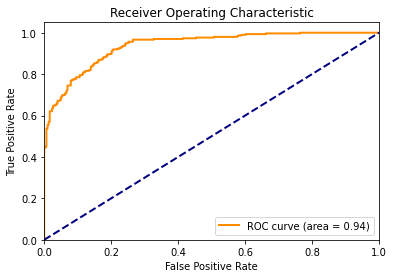

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.31903037858123523
Validation Loss: 0.41841649102353284
Training Time (seconds): 408.95135974884033
Inference Time (seconds): 21.94732689857483
Validation Accuracy: 0.8285714285714286
Test Accuracy: 0.8433333333333334
Confusion Matrix:
 [[265  37]
 [ 57 241]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       302
           1       0.87      0.81      0.84       298

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600

ROC AUC Score: 0.9379361304946887
Metrics saved successfully


In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Attention Mechanism+Dense

In [101]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Conv2D, multiply, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add attention mechanism
attention = Dense(1, activation='tanh')(x)
attention = Reshape((-1, 1))(attention)
attention = Activation('softmax')(attention)

# Apply attention to the feature maps
x = multiply([base_model.output, attention])

# Add Dense layers
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 224, 224,  │      1,792 │ input_layer_11[0… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 224, 224,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 112, 112,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 112, 112,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 112, 112,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 56, 56,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 56, 56,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 56, 56,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 56, 56,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 28, 28,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 28, 28,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 28, 28,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 28, 28,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 14, 14,    │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 14, 14,    │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 14, 14,    │  2,359,808 │ block5_conv1[0][

 Total params: 14,846,786 (56.64 MB)

 Trainable params: 132,098 (516.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [102]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5000 - loss: 0.9713 - val_accuracy: 0.6607 - val_loss: 0.6350
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.6885 - loss: 0.5894 - val_accuracy: 0.7500 - val_loss: 0.5570
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7787 - loss: 0.4966 - val_accuracy: 0.7786 - val_loss: 0.5025
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8088 - loss: 0.4295 - val_accuracy: 0.8071 - val_loss: 0.4690
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8196 - loss: 0.3962 - val_accuracy: 0.7929 - val_loss: 0.4591
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8587 - loss: 0.3583 - val_accuracy: 0.8143 - val_loss: 0.4390
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8387 - loss: 0.3644 - val_accuracy: 0.8000 - val_loss: 0.4367
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8514 - loss: 0.3340 - val_accuracy: 0.8107 - val_loss:

19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step


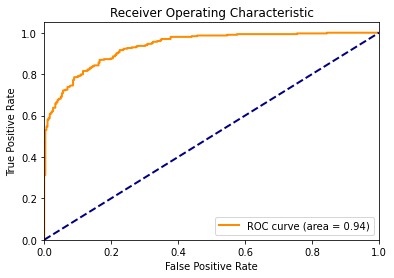

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.32348296783043085
Validation Loss: 0.40018497425266397
Training Time (seconds): 1374.9660947322845
Inference Time (seconds): 22.647472858428955
Validation Accuracy: 0.825
Test Accuracy: 0.845
Confusion Matrix:
 [[258  44]
 [ 49 249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       302
           1       0.85      0.84      0.84       298

    accuracy                           0.84       600
   macro avg       0.85      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600

ROC AUC Score: 0.9352693453042357
Metrics saved successfully


In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [104]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9318 - loss: 0.2047 - val_accuracy: 0.8321 - val_loss: 0.4084
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9412 - loss: 0.1932 - val_accuracy: 0.8286 - val_loss: 0.4145
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9388 - loss: 0.1907 - val_accuracy: 0.8214 - val_loss: 0.4030
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9338 - loss: 0.1923 - val_accuracy: 0.8357 - val_loss: 0.4195
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9436 - loss: 0.1827 - val_accuracy: 0.8214 - val_loss: 0.4180
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9426 - loss: 0.1868 - val_accuracy: 0.8143 - val_loss: 0.4355
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9405 - loss: 0.1770 - val_accuracy: 0.8357 - val_loss: 0.4112
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9492 - loss: 0.1765 - val_accuracy: 0.8286 - v

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


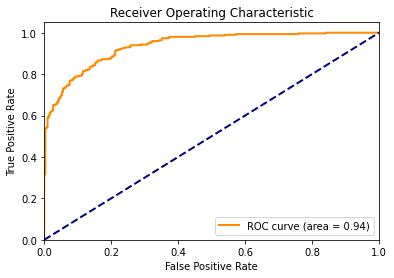

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.31965985493864424
Validation Loss: 0.4019617117011287
Training Time (seconds): 410.50011825561523
Inference Time (seconds): 22.02294087409973
Validation Accuracy: 0.8214285714285714
Test Accuracy: 0.845
Confusion Matrix:
 [[261  41]
 [ 52 246]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       302
           1       0.86      0.83      0.84       298

    accuracy                           0.84       600
   macro avg       0.85      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600

ROC AUC Score: 0.9372583225921152
Metrics saved successfully


In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [106]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9276 - loss: 0.1913 - val_accuracy: 0.8250 - val_loss: 0.4136
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9486 - loss: 0.1681 - val_accuracy: 0.8321 - val_loss: 0.4078
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9477 - loss: 0.1705 - val_accuracy: 0.8321 - val_loss: 0.4028
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9489 - loss: 0.1725 - val_accuracy: 0.8321 - val_loss: 0.4114
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9350 - loss: 0.1783 - val_accuracy: 0.8357 - val_loss: 0.4075
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9478 - loss: 0.1629 - val_accuracy: 0.8214 - val_loss: 0.4238
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9569 - loss: 0.1525 - val_accuracy: 0.8357 - val_loss: 0.4114
Epoch 8/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9598 - loss: 0.1551 - val_accuracy: 0.8286 - v

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


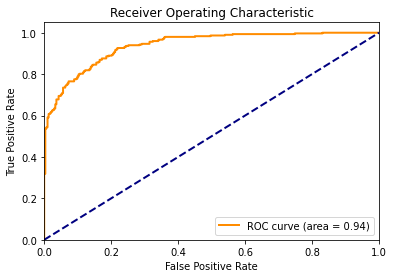

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3174985153972495
Validation Loss: 0.4020123854338867
Training Time (seconds): 410.4967534542084
Inference Time (seconds): 22.061883687973022
Validation Accuracy: 0.8321428571428572
Test Accuracy: 0.845
Confusion Matrix:
 [[263  39]
 [ 54 244]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       302
           1       0.86      0.82      0.84       298

    accuracy                           0.84       600
   macro avg       0.85      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600

ROC AUC Score: 0.9380916929641318
Metrics saved successfully


In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [108]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9316 - loss: 0.1852 - val_accuracy: 0.8286 - val_loss: 0.4253
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9388 - loss: 0.1789 - val_accuracy: 0.8286 - val_loss: 0.4072
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9486 - loss: 0.1605 - val_accuracy: 0.8286 - val_loss: 0.4207
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9400 - loss: 0.1693 - val_accuracy: 0.8357 - val_loss: 0.4007
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9583 - loss: 0.1600 - val_accuracy: 0.8286 - val_loss: 0.4154
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9584 - loss: 0.1460 - val_accuracy: 0.8357 - val_loss: 0.4235
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9553 - loss: 0.1489 - val_accuracy: 0.8286 - val_loss: 0.4088
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9590 - loss: 0.1597 - val_accuracy: 0.8357 - v

19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


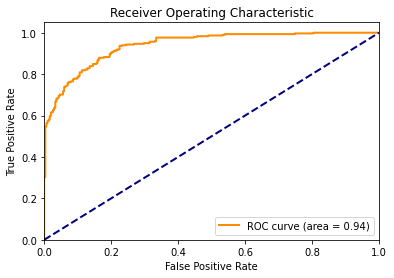

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.31987938428846197
Validation Loss: 0.40030907240006053
Training Time (seconds): 461.57826375961304
Inference Time (seconds): 21.991103649139404
Validation Accuracy: 0.8357142857142857
Test Accuracy: 0.85
Confusion Matrix:
 [[270  32]
 [ 58 240]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       302
           1       0.88      0.81      0.84       298

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

ROC AUC Score: 0.939158407040313
Metrics saved successfully


In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Capsule+Dense

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of VGG16

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add Capsule Network
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Reshape((-1, 512))(x)  # Reshape to 3D tensor for Capsule Network
x = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
x = Flatten()(x)  # Flatten the output
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer (CapsuleLayer)    │ (None, 160)            │        81,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        20,608 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 14,817,345 (56.52 MB)

 Trainable params: 102,657 (401.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6076 - loss: 0.6601 - val_accuracy: 0.7714 - val_loss: 0.5222
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8195 - loss: 0.4576 - val_accuracy: 0.7857 - val_loss: 0.4570
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8573 - loss: 0.3501 - val_accuracy: 0.8214 - val_loss: 0.4137
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8890 - loss: 0.2811 - val_accuracy: 0.8000 - val_loss: 0.4742
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8795 - loss: 0.2943 - val_accuracy: 0.8000 - val_loss: 0.4234
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8867 - loss: 0.2606 - val_accuracy: 0.8357 - val_loss: 0.3857
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9231 - loss: 0.2172 - val_accuracy: 0.8214 - val_loss: 0.4114
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9282 - loss: 0.1961 - val_accuracy: 0.8214 - val_loss:

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 904ms/step


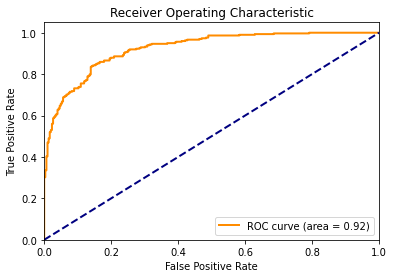

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
Test Loss: 0.36850667046750646
Validation Loss: 0.38378261098226896
Training Time (seconds): 556.2613651752472
Inference Time (seconds): 17.449573278427124
Validation Accuracy: 0.8357142857142857
Test Accuracy: 0.835
Confusion Matrix:
 [[260  42]
 [ 57 241]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       302
           1       0.85      0.81      0.83       298

    accuracy                           0.83       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600

ROC AUC Score: 0.9234132628116805
Metrics saved successfully


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9190 - loss: 0.2072 - val_accuracy: 0.8250 - val_loss: 0.4106
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9091 - loss: 0.1974 - val_accuracy: 0.8250 - val_loss: 0.4241
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9157 - loss: 0.1896 - val_accuracy: 0.7964 - val_loss: 0.4882
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9270 - loss: 0.1674 - val_accuracy: 0.8286 - val_loss: 0.4354
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9409 - loss: 0.1487 - val_accuracy: 0.8036 - val_loss: 0.5397
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9364 - loss: 0.1486 - val_accuracy: 0.8143 - val_loss: 0.5119
Training Time: 305.4522931575775 seconds


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


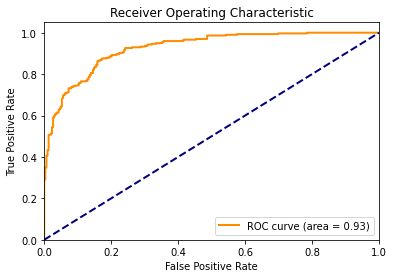

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.3732284477570526
Validation Loss: 0.40794244241785477
Training Time (seconds): 305.4522931575775
Inference Time (seconds): 22.066418170928955
Validation Accuracy: 0.825
Test Accuracy: 0.8416666666666667
Confusion Matrix:
 [[256  46]
 [ 49 249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       302
           1       0.84      0.84      0.84       298

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600

ROC AUC Score: 0.9261022712120538
Metrics saved successfully


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9101 - loss: 0.2075 - val_accuracy: 0.8214 - val_loss: 0.4239
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9235 - loss: 0.1851 - val_accuracy: 0.8321 - val_loss: 0.4223
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9253 - loss: 0.1835 - val_accuracy: 0.8036 - val_loss: 0.4865
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9296 - loss: 0.1661 - val_accuracy: 0.8071 - val_loss: 0.4777
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9436 - loss: 0.1320 - val_accuracy: 0.8214 - val_loss: 0.4980
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9209 - loss: 0.1737 - val_accuracy: 0.7929 - val_loss: 0.5327
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9150 - loss: 0.1934 - val_accuracy: 0.8143 - val_loss: 0.5437
Training Time: 358.7519521713257 seconds


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


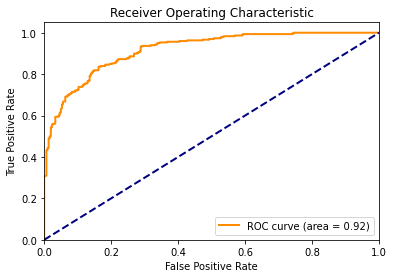

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.4449474804304903
Validation Loss: 0.420492772762114
Training Time (seconds): 358.7519521713257
Inference Time (seconds): 22.05082631111145
Validation Accuracy: 0.8321428571428572
Test Accuracy: 0.8133333333333334
Confusion Matrix:
 [[275  27]
 [ 85 213]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       302
           1       0.89      0.71      0.79       298

    accuracy                           0.81       600
   macro avg       0.83      0.81      0.81       600
weighted avg       0.83      0.81      0.81       600

ROC AUC Score: 0.9172796568736388
Metrics saved successfully


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9268 - loss: 0.1864 - val_accuracy: 0.8286 - val_loss: 0.4533
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9344 - loss: 0.1439 - val_accuracy: 0.8143 - val_loss: 0.4672
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9363 - loss: 0.1491 - val_accuracy: 0.8214 - val_loss: 0.4706
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9484 - loss: 0.1284 - val_accuracy: 0.8179 - val_loss: 0.4835
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9385 - loss: 0.1342 - val_accuracy: 0.8107 - val_loss: 0.4973
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9374 - loss: 0.1412 - val_accuracy: 0.7964 - val_loss: 0.5136
Training Time: 307.4397339820862 seconds


19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


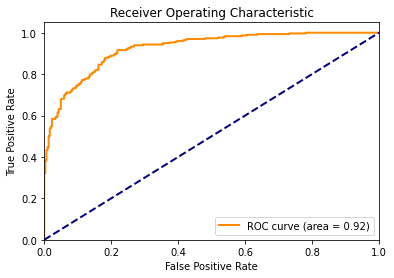

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Test Loss: 0.43088259444102905
Validation Loss: 0.4503007986173944
Training Time (seconds): 307.4397339820862
Inference Time (seconds): 22.065205335617065
Validation Accuracy: 0.8285714285714286
Test Accuracy: 0.8216666666666667
Confusion Matrix:
 [[274  28]
 [ 79 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       302
           1       0.89      0.73      0.80       298

    accuracy                           0.82       600
   macro avg       0.83      0.82      0.82       600
weighted avg       0.83      0.82      0.82       600

ROC AUC Score: 0.9246133161473842
Metrics saved successfully


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_2000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_2000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")